# STEP 02: Data exploration, Sun position Version 001

In this notebook, the data exploration of the **sun position** is covered. There are three data sources that are being explored:

1. Weather: Information on temperature, cloud coverage, precipitation, etc at the location using the DarkSkyAPI
2. Sun position: Information on the position of the sun in the sky at the location using pysolar.solar
3. Solar panel production: Information on the amount of energy produced by the solar panels at the location

In [25]:
import datetime
import numpy as np
import pandas as pd
import requests
import re
import json
import os
from dateutil import tz
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# Load data

In [26]:
save_path = "./data/pysolar/"
data = pd.read_csv(f'{save_path}/sun_data.csv', index_col=0)
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')
data.head()

,altitude,azimuth,clear_sky_irradiation
date,,,
2017-10-01 00:00:00,-45.137899,356.140089,0.0
2017-10-01 01:00:00,-43.985195,17.161963,0.0
2017-10-01 02:00:00,-39.464713,36.353673,0.0
2017-10-01 03:00:00,-32.427126,52.733338,0.0
2017-10-01 04:00:00,-23.774194,66.626680,0.0


# Description

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15217 entries, 2017-10-01 00:00:00 to 2019-06-27 00:00:00
Data columns (total 3 columns):
altitude                 15217 non-null float64
azimuth                  15217 non-null float64
clear_sky_irradiation    15217 non-null float64
dtypes: float64(3)
memory usage: 475.5 KB


In [28]:
data.describe()

,altitude,azimuth,clear_sky_irradiation
count,15217.000000,15217.000000,15217.000000
mean,-1.278435,182.298847,323.068306
std,32.089293,100.838411,376.579608
min,-65.184348,8.137939,0.000000
25%,-25.151267,92.456241,0.000000
50%,-1.186533,186.651396,0.000000
75%,22.313341,271.138834,761.939397
max,65.062445,357.938316,922.756415


# Visualization

## Altitude

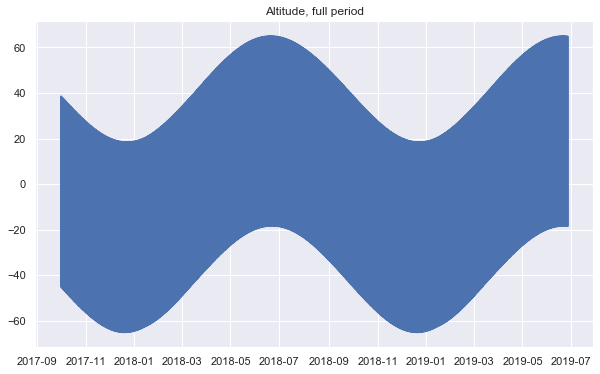

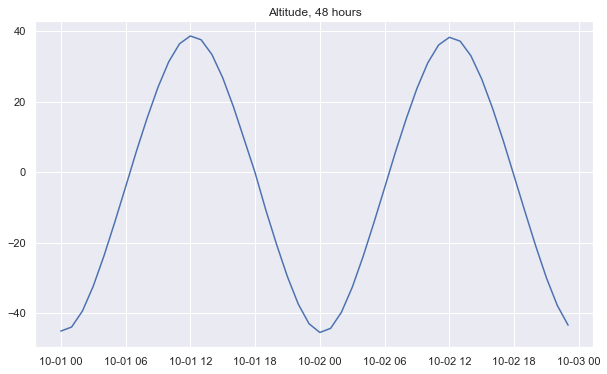

In [34]:
fig = plt.figure(figsize=(10,6))
plt.plot(data['altitude'])
plt.title('Altitude, full period')
plt.show()
fig = plt.figure(figsize=(10,6))
plt.plot(data.loc['2017-10-01':'2017-10-02','altitude'])
plt.title('Altitude, 48 hours')
plt.show()

## Azimuth

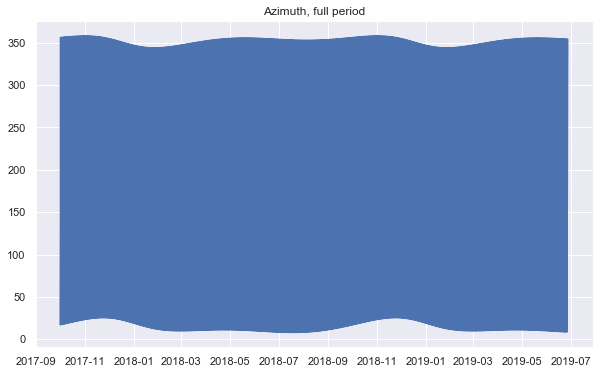

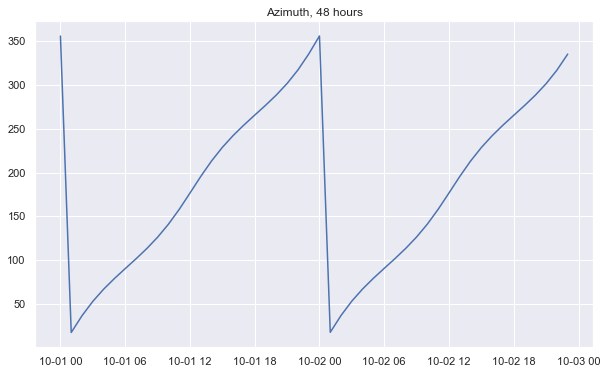

In [35]:
fig = plt.figure(figsize=(10,6))
plt.plot(data['azimuth'])
plt.title('Azimuth, full period')
plt.show()
fig = plt.figure(figsize=(10,6))
plt.plot(data.loc['2017-10-01':'2017-10-02','azimuth'])
plt.title('Azimuth, 48 hours')
plt.show()

## clear_sky_irradiation

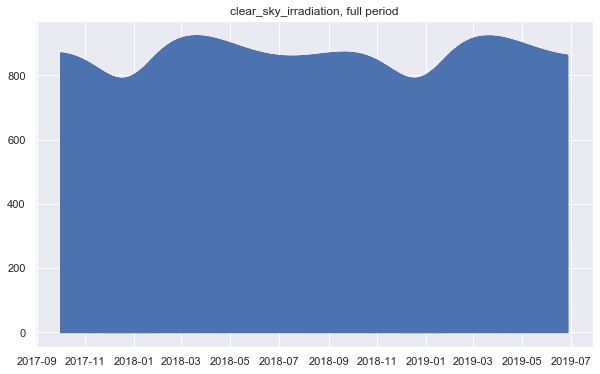

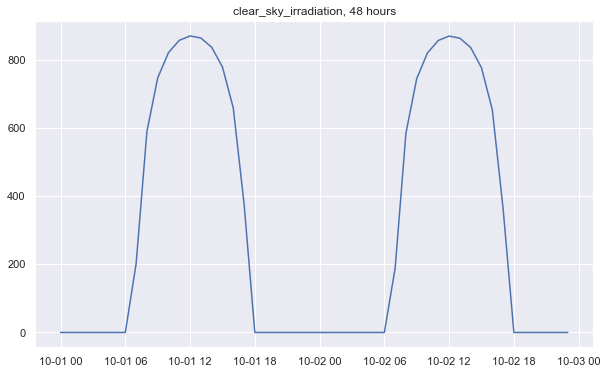

In [36]:
fig = plt.figure(figsize=(10,6))
plt.plot(data['clear_sky_irradiation'])
plt.title('clear_sky_irradiation, full period')
plt.show()
fig = plt.figure(figsize=(10,6))
plt.plot(data.loc['2017-10-01':'2017-10-02','clear_sky_irradiation'])
plt.title('clear_sky_irradiation, 48 hours')
plt.show()

From the pysolar wiki:

Once you calculate azimuth and altitude of the sun, you can predict the direct irradiation from the sun using Pysolar. get_radiation_direct() returns a value in watts per square meter. As of version 0.7, the function is not smart enough to return zeros at night. It does account for the scattering of light by the atmosphere, though it uses an atmospheric model based on data taken in the United States